<a href="https://colab.research.google.com/github/enino84/enino84.github.io/blob/main/courses/intro_data_assimilation/ENDJ_DA_LETKF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

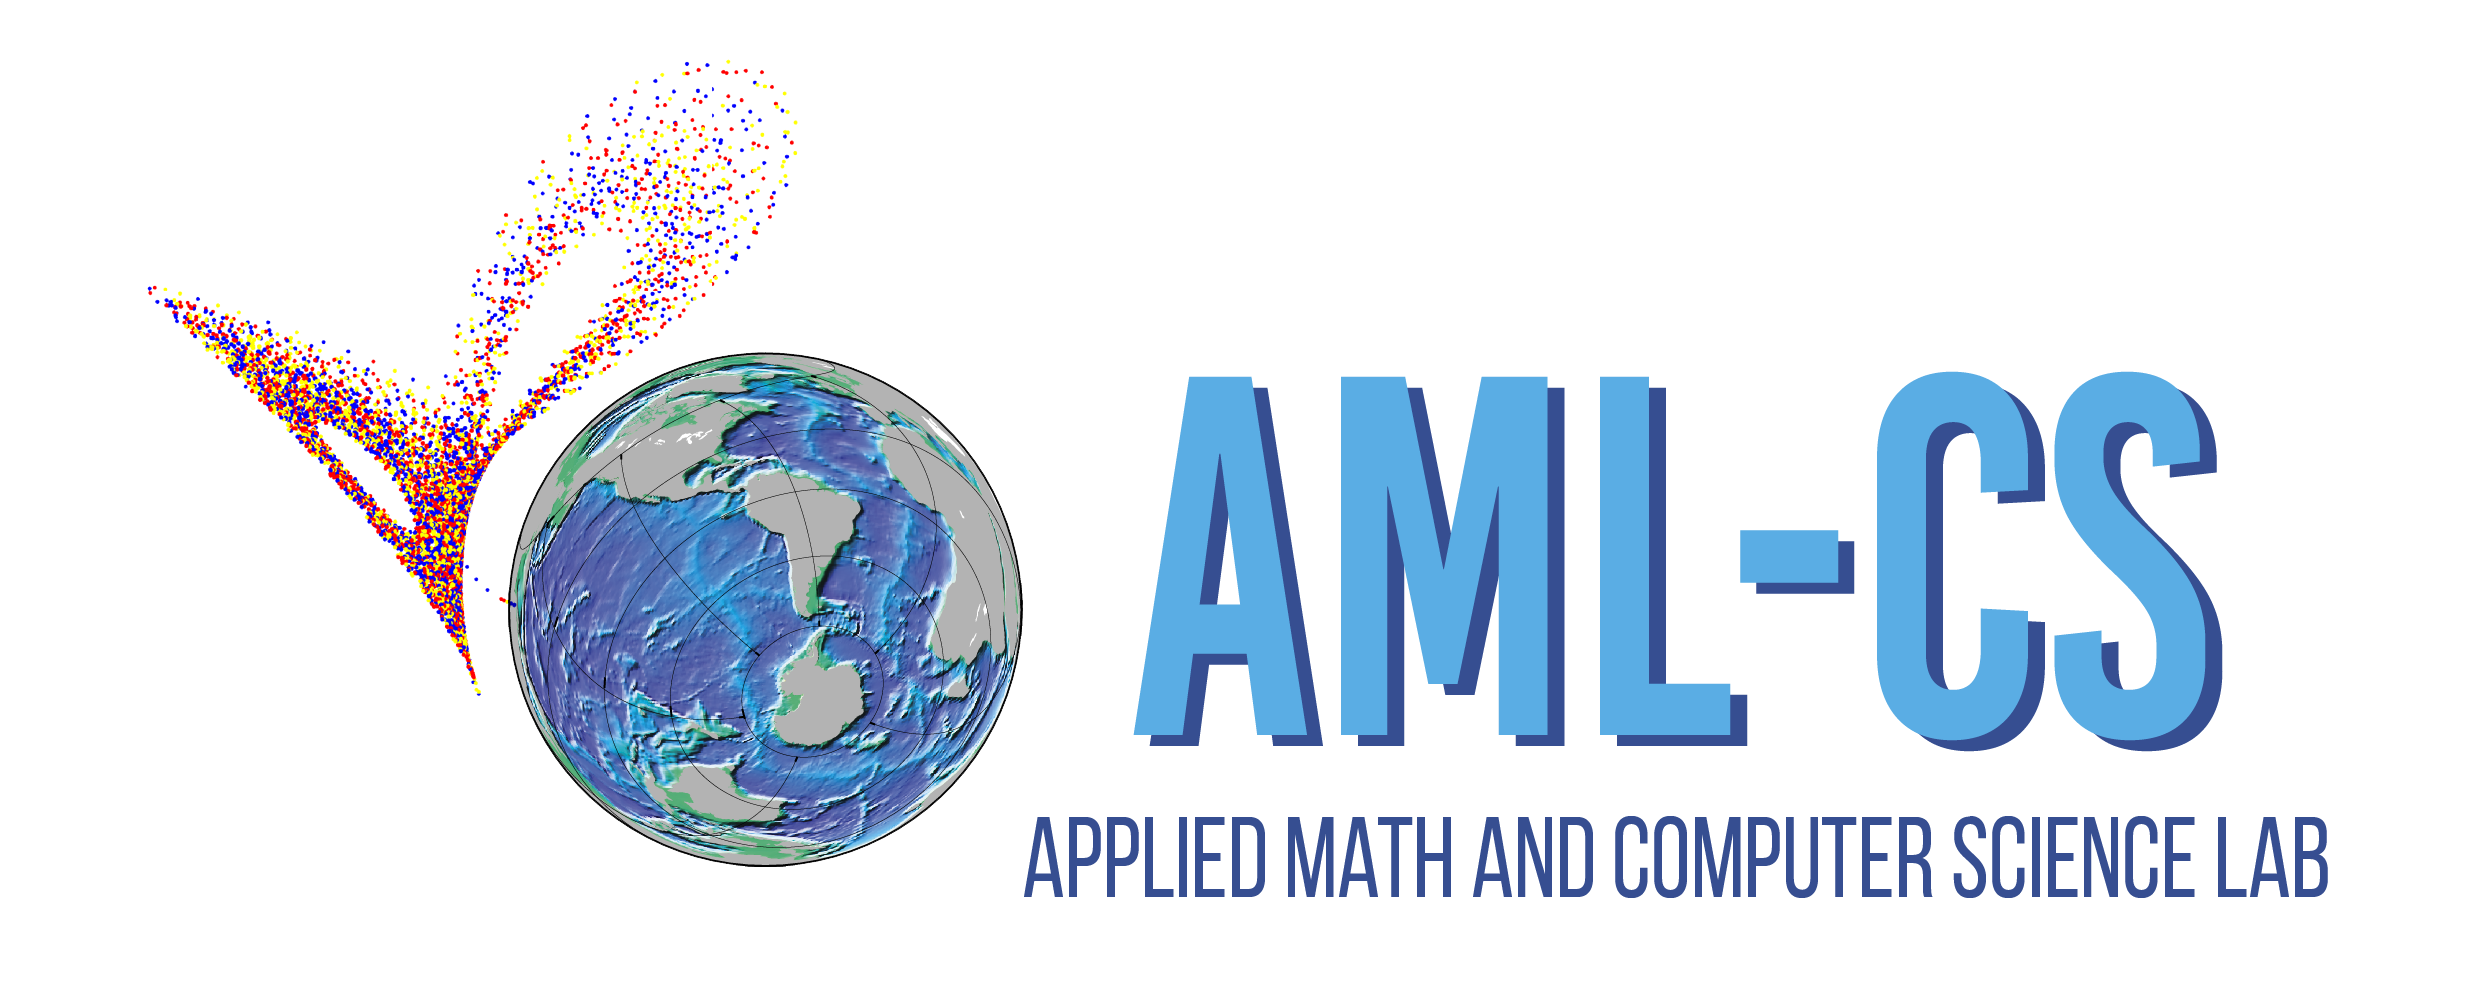

# Instructor:

**Elías D. Nino-Ruiz, Ph.D.**  
enino@uninorte.edu.co - elias.d.nino@gmail.com  
https://enino84.github.io/ - https://aml-cs.github.io/

# **Data Assimilation - Ensemble square root filters - The ensemble transform Kalman filter.**


# **Ensemble Square Root Filter**

1. Tippett, M. K., Anderson, J. L., Bishop, C. H., Hamill, T. M., & Whitaker, J. S. (2003). Ensemble square root filters. Monthly Weather Review, 131(7), 1485-1490.
2. Nerger, L., Janjić, T., Schröter, J., & Hiller, W. (2012). A unification of ensemble square root Kalman filters. Monthly Weather Review, 140(7), 2335-2345.

Ensemble Square Root Filter:

1. They don't use synthetic data.
2. Transformation of prior moments into posterior ones.
3. They proceed as follows:
* They compute the posterior mean.
* They compute the analysis anomialies.

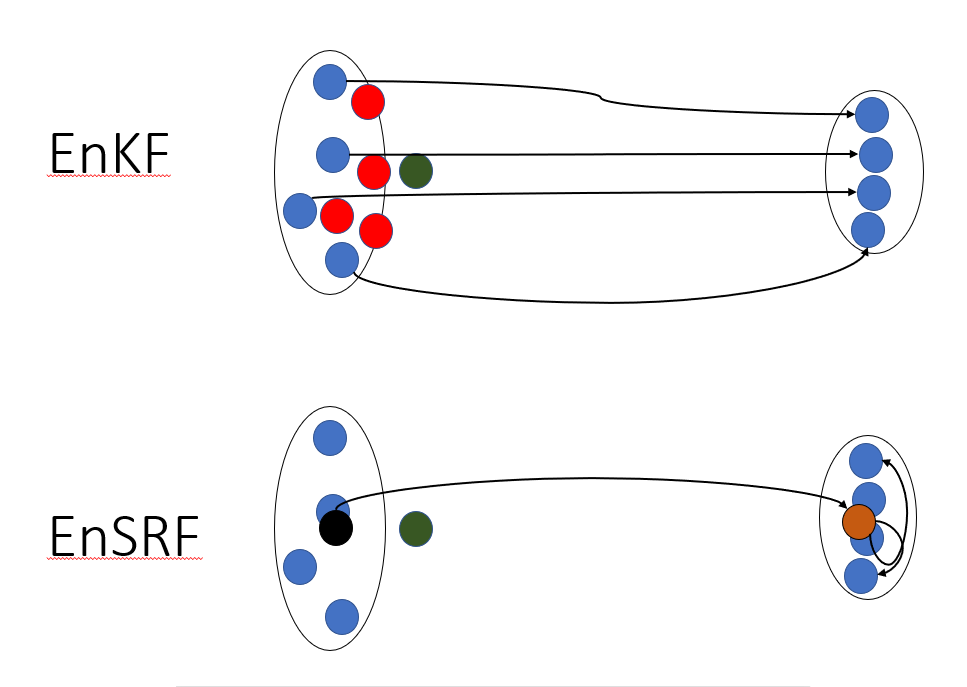

# **Ensemble Square Root Filter (EnSRF)**

$\newcommand{\X}{{\bf X}}$
$\newcommand{\x}{{\bf x}}$
$\newcommand{\DX}{\boldsymbol{\Delta}{\bf X}}$
$\newcommand{\DXt}{\widetilde{\boldsymbol{\Delta}{\bf X}}}$
$\newcommand{\P}{{\bf P}}$
$\newcommand{\xm}{\overline{{\bf x}}}$

Background ensemble

$\X^b = [\x^{b[1]},\,\x^{b[2]},\,\ldots,\x^{b[N]}] \in \Re^{n \times N}$

Prior moments:

1. Ensemble mean: $\xm^b = \frac{1}{N} \sum_{e=1}^N \x^{b[e]} \in \Re^{N \times N}$

2. Background error covariance matrix:
\begin{eqnarray}
\P^b = \frac{1}{N-1} \cdot \DX \cdot \DX^T = \DXt \cdot \DXt^T
\end{eqnarray}
where the matrix of member deviations (anomalies) $\DX$ reads
\begin{eqnarray}
\DX = \X^b-\xm^b \cdot {\bf 1}_N^T \in \Re^{n \times N}
\end{eqnarray}
and $\DXt = \frac{1}{\sqrt{N-1}} \DX$

$\newcommand{\y}{{\bf y}}$
$\newcommand{\V}{{\bf V}}$
$\newcommand{\R}{{\bf R}}$
$\newcommand{\H}{{\bf H}}$
$\newcommand{\z}{{\bf z}}$
$\newcommand{\dv}{{\bf d}}$
$\newcommand{\I}{{\bf I}}$
$\newcommand{\K}{{\bf K}}$

## 1. Let's compute the posterior mean

We have an observation $\y \in \Re^{m \times 1}$, the data error covariance matrix $\R \in \Re^{m \times m}$, and the observational operator $\H \in \Re^{m \times n}$.

The posterior mean reads:
$\xm^a = \xm^b + \P^b \H^T \z$ where
\begin{eqnarray}
(\R + \H \P^b \H^T) \z = \dv\,,
\end{eqnarray}
and $\dv = \y-\H \xm^b \in \Re^{m \times 1}$. But, as we talk about ensemble square root filters, commonly the equations are written as follows:

$\xm^a = \xm^b + \DXt \V^T \z$ where
\begin{eqnarray}
(\R + \V \V^T) \z = \dv \,,
\end{eqnarray}
$\dv = \y-\H \xm^b \in \Re^{m \times 1}$, and $\V = \H \DXt \in \Re^{m \times N}$, basically we don't compute $\P^b$ but we use a square root.





## 2. Let's compute the posterior anomalies

$\P^a = (\I-\K \H) \P^b$ where $\K = \P^b \H^T (\R + \H \P^b \H)^{-1}$, as homework apply Woodbury Matrix Identity on
\begin{eqnarray}
\P^a = (\P^{b-1} + \H^T \R^{-1} \H)^{-1}
\end{eqnarray}

\begin{eqnarray}
\P^a &=& (\I-\K \H) \P^b \\
&=& (\I-\P^b \H^T (\R + \H \P^b \H)^{-1} \H) \P^b \\
&=& \P^b-\P^b \H^T (\R + \H \P^b \H)^{-1} \H \P^b \\
&=& \DXt \DXt^T-\DXt \DXt^T \H^T (\R + \H \DXt \DXt^T \H)^{-1} \H \DXt \DXt^T \\
&=& \DXt \DXt^T-\DXt \V^T (\R + \V \V^T )^{-1} \V \DXt^T \\
&=& \DXt [\DXt^T- \V^T (\R + \V \V^T )^{-1} \V \DXt^T] \\
&=& \DXt [\I- \V^T (\R + \V \V^T )^{-1} \V] \DXt^T \\
\end{eqnarray}

where, we have found:
$\P^a = \DXt [\I- \V^T (\R + \V \V^T )^{-1} \V] \DXt^T$, note that: $\I- \V^T (\R + \V \V^T )^{-1} \V \in \Re^{N \times N}$

A square root of 

$\widetilde{\P^{a{1/2}}} = [\I- \V^T (\R + \V \V^T )^{-1} \V]^{1/2}$.

The posterior ensemble reads:
\begin{eqnarray}
\X^a = \xm^a {\bf 1}_N^T + \DXt \cdot \widetilde{\P^{a{1/2}}} 
\end{eqnarray}

This square root is not unique:

\begin{eqnarray}
\P^a &=& \DXt [\I- \V^T (\R + \V \V^T )^{-1} \V] \DXt^T \\
&=& \DXt \widetilde{\P^{a{1/2}}} \widetilde{\P^{a{T/2}}} \DXt^T = \DXt \widetilde{\P^{a{1/2}}} \underbrace{{\bf U} {\bf U}^T}_{{\bf I}} \widetilde{\P^{a{T/2}}} \DXt^T  \\
\end{eqnarray}

Note that:
$$\DXt \widetilde{\P^{a{1/2}}} {\bf U}$$


Conclusions:

1. EnSRF don't use synthetic data.
2. They can be sensible to covariance inflation* (to be discussed next class).
3. Localization? - domain composition - Local Ensemble Transform Kalman Filter

What to do:

1. Ott, E., Hunt, B. R., Szunyogh, I., Zimin, A. V., Kostelich, E. J., Corazza, M., ... & Yorke, J. A. (2004). A local ensemble Kalman filter for atmospheric data assimilation. Tellus A: Dynamic Meteorology and Oceanography, 56(5), 415-428. **LETKF**

2. Tippett, M. K., Anderson, J. L., Bishop, C. H., Hamill, T. M., & Whitaker, J. S. (2003). Ensemble square root filters. Monthly Weather Review, 131(7), 1485-1490.

# **Ensemble Transform Kalman Filter (ETKF)**

Background ensemble

$\X^b = [\x^{b[1]},\,\x^{b[2]},\,\ldots,\x^{b[N]}] \in \Re^{n \times N}$

Prior moments:

1. Ensemble mean: $\xm^b = \frac{1}{N} \sum_{e=1}^N \x^{b[e]} \in \Re^{N \times N}$

2. Background error covariance matrix:
\begin{eqnarray}
\P^b = \frac{1}{N-1} \cdot \DX \cdot \DX^T = \DXt \cdot \DXt^T
\end{eqnarray}
where the matrix of member deviations (anomalies) $\DX$ reads
\begin{eqnarray}
\DX = \X^b-\xm^b \cdot {\bf 1}_N^T \in \Re^{n \times N}
\end{eqnarray}
and $\DXt = \frac{1}{\sqrt{N-1}} \DX$


We constraint prior moments to the space spanned by the ensemble of anomalies $\DX$

\begin{eqnarray}
\x = \xm^b + \DX \va = \xm^b + \sum_{e=1}^N \alpha_i\dx_i  \in \Re^{n \times 1}
\end{eqnarray}

Recall

\begin{eqnarray}
\mathcal{J}(\x) = \frac{1}{2}\norm{\x-\x^b}^2_{\B^{-1}} + \frac{1}{2}\norm{\y-\H\x}^2_{\R^{-1}} \approx \widehat{\mathcal{J}}(\x) =  \frac{1}{2}\norm{\x-\xm^b}^2_{{\P}^{b-1}} + \frac{1}{2}\norm{\y-\H\x}^2_{\R^{-1}} 
\end{eqnarray}
We have $\x - \xm^b = \DX \va$, and therefore
\begin{eqnarray}
\widehat{\mathcal{J}}(\x) = \widehat{\mathcal{J}}(\xm^b + \DX \va) &=&  \frac{1}{2}\norm{\DX \va}^2_{{\P}^{b-1}} + \frac{1}{2}\norm{\y-\H[\xm^b + \DX \va]}^2_{\R^{-1}} \\
&=&  \frac{1}{2}\norm{\va}^2 + \frac{1}{2}\norm{\dv-\Q\va}^2_{\R^{-1}}
\end{eqnarray}
where $\dv = \y -\H \xm^b \in \Re^{m \times 1}$, and $\Q = \H \DX \in \Re^{m \times N}$. We have 
\begin{eqnarray}
\nabla_{\va}\widehat{\mathcal{J}}(\xm^b + \DX \va) = \left[(N-1){\bf I} + \Q^T \R^{-1} \Q \right] \va - \Q^T \R^{-1} \dv
\end{eqnarray}

Cause we want to find
\begin{eqnarray}
\va^{*} = \arg\,\underset{\va}{\min}\widehat{\mathcal{J}}(\xm^b + \DX \va) \,,
\end{eqnarray}
we then have
\begin{eqnarray}
\xm^a = \xm^b + \DX \va^{*}\,,
\end{eqnarray}
We know that:
\begin{eqnarray}
 \va^{*} = \left[(N-1){\bf I} + \Q^T \R^{-1} \Q \right]^{-1} \Q^T \R^{-1} \dv
\end{eqnarray}

We have a projection of $\P^a$ onto the ensemble space:
\begin{eqnarray}
\left[(N-1){\bf I} + \Q^T \R^{-1} \Q \right]^{-1}
\end{eqnarray}
We want the square root:
\begin{eqnarray}
\left[(N-1){\bf I} + \Q^T \R^{-1} \Q \right]^{-1/2}
\end{eqnarray}

We can proceed as follows:
\begin{eqnarray}
\left[(N-1){\bf I} + \Q^T \R^{-1} \Q \right] = {\bf U}\boldsymbol{\Sigma}{\bf U}^T
\end{eqnarray}

then

\begin{eqnarray}
\left[(N-1){\bf I} + \Q^T \R^{-1} \Q \right]^{-1/2} = {\bf U}\boldsymbol{\Sigma}^{-1/2}{\bf U}^T
\end{eqnarray}







# **Inflation**

1. To prevent ensemble collapsing.
2. Enemble square root filters are hihgly more sensitive to ensemble collapsing.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy as sci
from sklearn.model_selection import train_test_split
import scipy as sci
import seaborn as sns
from sklearn.linear_model import Ridge

# **Lorenz 96**

In [ ]:
#y = [x, y, z]
def lorenz96(t, y):
  return [(y[np.mod(i+1,40)]-y[i-2])*y[i-1]-y[i]+8 for i in range(0,40)];

In [ ]:
np.random.seed(10);

t0 = 0;
tf = 10;
t = np.arange(t0, tf, 0.005);
sol = solve_ivp(lorenz96, [t0, tf], np.random.randn(40), t_eval=t);
y = sol.y;

ic = y[:,-1];
Nens = 200;
white_noise = np.random.randn(Nens,40);
e_0 = ic + 0.05*white_noise; #perturbed ensemble

eb = [];
t0 = 0;
tf = 10;
t = np.arange(t0, tf, 0.005);
for e in e_0:
  sol = solve_ivp(lorenz96, [t0, tf], e, t_eval=t);
  eb.append(sol.y);

# **Analysis Steps**

Ensemble Square Root Filter (EnSRF)


${\bf X}^a ={\bf X}^b + [\widehat{\bf B}^{-1} + {\bf H}^T {\bf R}^{-1} {\bf H}]^{-1} {\bf H}^T {\bf R}^{-1} \left[ {\bf Y}^{S} - {\bf H} {\bf X}^b \right ]$ - Modified Cholesky ${\bf B}^{-1} \approx \widehat{{\bf B}}^{-1} = \widehat{{\bf L}}^T \cdot \widehat{{\bf D}}^{-1} \cdot \widehat{{\bf L}}$

In [ ]:
def get_predecessors(n, delta):
  indexes = np.arange(0,n);
  local_boxes = [];
  predecessors = [];
  for i in indexes:
    local_box_i = [];
    for q in range(i-delta, i+delta+1):
      local_box_i.append(np.mod(q, n))
    local_box_i = np.array(local_box_i, dtype=np.int32);
    predecessors_i = local_box_i[local_box_i<i];
    local_boxes.append(local_box_i);
    predecessors.append(predecessors_i);
  return predecessors;

def get_modified_Cholesky(XB, predecessors):
  DX = XB - np.mean(XB,axis=1).reshape(-1,1);
  n, N = DX.shape;
  lr = Ridge(fit_intercept=False, alpha=10);
  L = np.eye(n);
  D = np.zeros((n,n));
  for i in range(0, n):
    pre_i = predecessors[i];
    if pre_i.size>0:
      y = DX[i,:].T;
      X = DX[pre_i,:].T;
      lr_fit = lr.fit(X, y);
      L[i, pre_i] = -lr_fit.coef_;
      D[i,i] = 1/np.var(y - lr_fit.predict(X));
    else:
      D[i,i] = 1/np.var(DX[i,:]);
  return L.T @ D @ L;

def compute_analysis_enkf_modified_Cholesky(XB, Binv, H, Ys, R):
  R_inv = np.linalg.inv(R); #NO hacer en casa
  Ds = H.T @ R_inv @ (Ys - H @ XB);
  Ainv = Binv + H.T @ R_inv @ H;
  DXa = np.linalg.solve(Ainv, Ds);
  XA = XB + DXa;
  return XA;



${\bf X}^a ={\bf X}^b + {\bf P}^b {\bf H}^T \left [{\bf R} + {\bf H} {\bf P}^b {\bf H}^T \right]^{-1} \left[ {\bf Y}^{S} - {\bf H} {\bf X}^b \right ] $

In [ ]:
def compute_analysis_enkf_obs(XB, PB, H, Ys, R):
  Ds = Ys - H @ XB;
  IN = R + H @ PB @ H.T;
  DXa = PB @ H.T @ np.linalg.solve(IN, Ds);
  XA = XB + DXa;
  return XA;

${\bf X}^a ={\bf X}^b + [{\bf P}^{b{-1}} + {\bf H}^T {\bf R}^{-1} {\bf H}]^{-1} {\bf H}^T {\bf R}^{-1} \left[ {\bf Y}^{S} - {\bf H} {\bf X}^b \right ]$

In [ ]:
def compute_analysis_enkf_model(XB, PB, H, Ys, R):
  PB_inv = np.linalg.inv(PB); #NO hacer en casa
  R_inv = np.linalg.inv(R); #NO hacer en casa
  Ds = H.T @ R_inv @ (Ys - H @ XB);
  PA_inv = PB_inv + H.T @ R_inv @ H;
  DXa = np.linalg.solve(PA_inv, Ds);
  XA = XB + DXa;
  return XA;

${\bf X}^a = [{\bf P}^{b{-1}} + {\bf H}^T {\bf R}^{-1} {\bf H}]^{-1} \left [{\bf P}^{b-1} {\bf X}^b + {\bf H}^T {\bf R}^{-1} {\bf Y}^{S}  \right ]$



In [ ]:
def compute_analysis_enkf_model_dual(XB, PB, H, Ys, R):
  PB_inv = np.linalg.inv(PB); #NO hacer en casa
  R_inv = np.linalg.inv(R); #NO hacer en casa
  rhs = PB_inv @ XB + H.T @ R_inv @ Ys;
  PA_inv = PB_inv + H.T @ R_inv @ H;
  DXa = np.linalg.solve(PA_inv, rhs);
  XA = XB + DXa;
  return XA;

${\bf X}^a = {\bf X}^b + \underbrace{\boldsymbol{\Delta}{\bf X}^b  {\bf W}^{*} }_{\boldsymbol{\Delta}{\bf X}^a}$

$[(N-1) {\bf I} + {\bf Q}^T {\bf R}^{-1} {\bf Q}] {\bf W}^{*} = {\bf Q}^T {\bf R}^{-1} \left[ {\bf Y}^{S} - {\bf H} {\bf X}^b \right ]$ (we can make use of Cholesky)


In [ ]:
def compute_analysis_enkf_cholesky(XB, PB, H, Ys, R):
  xb = np.mean(XB, axis=1);
  DXb = XB-xb.reshape(-1,1);
  n,N = DXb.shape;
  Q = H @ DXb;
  R_inv = np.linalg.inv(R); #NO hacer en casa
  Z = Q.T @ R_inv @ (Ys-H @ XB);
  PA_inv_ens = (N-1)*np.eye(N) + Q.T @ R_inv @ Q;
  L = sci.linalg.cholesky(PA_inv_ens, lower=True);
  P = sci.linalg.solve_triangular(L, Z, lower=True); #L P = Z
  W = sci.linalg.solve_triangular(L.T, P); #L.T W = P
  DXa = DXb @ W;
  XA = XB + DXa;
  return XA;

# H for non-full observational network

In [ ]:
def get_random_H(p, n):
  indexes = np.arange(0,n);
  ind,_ = train_test_split(indexes, random_state=10, test_size=1-p)
  ind.sort();
  ind = ind.astype(np.int32);
  m = ind.size
  H = np.eye(n,n);
  H = H[ind,:];
  return H;

In [ ]:
def get_syn_observations(y, m, Nens, R):
  white_noise = np.random.multivariate_normal(np.zeros(m), R, size=Nens).T;
  Ys = y + white_noise;
  return Ys;

In [ ]:
def perform_forecast(x, t0, tf):
  sol = solve_ivp(lorenz96, [t0, tf], x);
  return sol.y[:,-1];

In [ ]:
def get_localization_matrix(r, n):
  L = np.array([[np.exp(-(min(((n+j)-i)**2,min((i-j)**2,((n+i)-j)**2)))/(2*r**2)) for i in range(0,n)] for j in range(0,n)], dtype=np.float32);
  return L;

In [ ]:
n = 40;
p = 0.8;
m = round(n*p)
Nens = 200;
R = np.diag(0.01**2 * np.ones(m));
M = 15;
r = 2;

# **Full assimilation cycles**

## For stochastic filters

In [ ]:
#reference solution
xref = ic;

#initial ensemble
XB = [e[:,-1] for e in eb] 
XB = np.array(XB, dtype=np.float32).T;

era = np.zeros(M);
erb = np.zeros(M);

#L = get_localization_matrix(r, n);

for k in range(0, M):
  #forecast for the reference solution (for reference)
  xref = perform_forecast(xref, 0, 0.05);

  #forecast step (background step)
  for e in range(0,Nens):
    XB[:,e] = perform_forecast(XB[:,e], 0, 0.05);
  
  #Forecast (localized precision matrix)
  pre = get_predecessors(n, r);
  Binv = get_modified_Cholesky(XB, pre);

  #get the observation
  H = get_random_H(p, n);
  y = H @ xref.reshape(-1,1) + np.random.multivariate_normal(np.zeros(m), R).reshape(-1,1);
  Ys = get_syn_observations(y, m, Nens, R);

  #analysis step
  #XA = compute_analysis_enkf_obs(XB, PB, H, Ys, R);
  #XA = compute_analysis_enkf_model(XB, PB, H, Ys, R);
  #XA = compute_analysis_enkf_model_dual(XB, PB, H, Ys, R);
  #XA = compute_analysis_enkf_cholesky(XB, PB, H, Ys, R);
  XA = compute_analysis_enkf_modified_Cholesky(XB, Binv, H, Ys, R);

  #assesing accuracies via the prior and the posterior first moments
  xb = np.mean(XB, axis=1);
  xa = np.mean(XA, axis=1);
  
  #L-2 norm of errors
  erb[k] = np.linalg.norm(xb-xref);
  era[k] = np.linalg.norm(xa-xref);

  XB = XA;

# Making plot

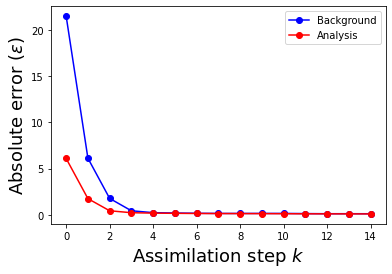

In [ ]:
plt.plot(erb, '-ob');
plt.plot(era, '-or');
plt.xlabel('Assimilation step $k$', fontdict={'size':18});
plt.ylabel('Absolute error ($\epsilon$)', fontdict={'size':18});
plt.legend(['Background', 'Analysis'])

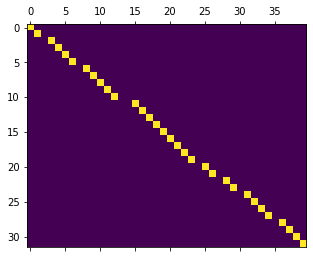

In [ ]:
plt.matshow(H)

In [ ]:
H.shape

(32, 40)

In [ ]:
H@np.arange(1,41)

array([ 1.,  2.,  4.,  5.,  6.,  7.,  9., 10., 11., 12., 13., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 26., 27., 29., 30., 32., 33.,
       34., 35., 37., 38., 39., 40.])

## For deterministic filters

# Ensemble Square Root Filter

$\xm^a = \xm^b + \DXt \V^T \z$ where
\begin{eqnarray}
(\R + \V \V^T) \z = \dv \,,
\end{eqnarray}
$\dv = \y-\H \xm^b \in \Re^{m \times 1}$, and $\V = \H \DXt \in \Re^{m \times N}$.

In [ ]:
def compute_analysis_ensrf(XB, DX, H, y, R):

  n,N = DX.shape;

  I = np.eye(N);
  xb = np.mean(XB, axis=1).reshape(-1,1);
  d = y - H @ xb;
  V = H @ DX;
  IN = R + V @ V.T;
  dxa = DX @ V.T @ np.linalg.solve(IN, d);
  xa = xb + dxa;
  
  Pat = I - V.T @ np.linalg.solve(IN, V)

  U,S,V = np.linalg.svd(Pat);

  Pat_sqrt = U @ np.diag(np.sqrt(S)) @ U.T;

  XA = xa + DX @ Pat_sqrt;

  return xa.reshape(-1,),XA;

# Ensemble Transform Kalman Filter

\begin{eqnarray}
\xm^a = \xm^b + \DX \va^{*}\,,
\end{eqnarray}
We know that:
\begin{eqnarray}
 \va^{*} = \left[(N-1){\bf I} + \Q^T \R^{-1} \Q \right]^{-1} \Q^T \R^{-1} \dv
\end{eqnarray}

In [ ]:
def compute_analysis_etkf(XB, DX, H, y, R):

  n,N = DX.shape;
  I = np.eye(N);
  xb = np.mean(XB, axis=1).reshape(-1,1);
  d = y - H @ xb;
  Q = H @ DX;
  Pa_ens_inv = (N-1)*I + Q.T @ np.linalg.solve(R, Q);
  rhs = Q.T @ np.linalg.solve(R, d);
  dxa = DX @ np.linalg.solve(Pa_ens_inv, rhs);
  xa = xb + dxa;

  U,S,V = np.linalg.svd(Pa_ens_inv);
  Ue = U[:,:-1]; #The mean makes the space N-1 degrees of freedom
  Pat_sqrt = Ue @ np.diag(np.sqrt(1/S[:-1])) @ Ue.T;

  DXA_inc = DX @ Pat_sqrt

  inf_fact = np.linalg.norm(DXA_inc);

  XA = xa + 10*DXA_inc/inf_fact;

  return xa.reshape(-1,),XA;

In [ ]:
n = 40;
p = 0.8;
m = round(n*p)
Nens = 200;
R = np.diag(0.01**2 * np.ones(m));
M = 15;
r = 2;

In [ ]:
#reference solution
xref = ic;

#initial ensemble
XB = [e[:,-1] for e in eb] 
XB = np.array(XB, dtype=np.float32).T;

era = np.zeros(M);
erb = np.zeros(M);

#L = get_localization_matrix(r, n);

for k in range(0, M):
  #forecast for the reference solution (for reference)
  xref = perform_forecast(xref, 0, 0.05);

  #forecast step (background step)
  for e in range(0,Nens):
    XB[:,e] = perform_forecast(XB[:,e], 0, 0.05);

  #get the observation
  H = get_random_H(p, n);
  y = H @ xref.reshape(-1,1) + np.random.multivariate_normal(np.zeros(m), R).reshape(-1,1);

  #background step
  xb = np.mean(XB, axis=1);
  DX = 1/np.sqrt(Nens-1)*(XB - xb.reshape(-1,1));

  #analysis step
  xa, XA = compute_analysis_etkf(XB, DX, H, y, R);

  #L-2 norm of errors
  erb[k] = np.linalg.norm(xb-xref);
  era[k] = np.linalg.norm(xa-xref);

  XB = XA;

## Making Plot

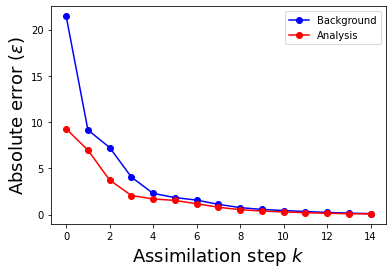

In [ ]:
plt.plot(erb, '-ob');
plt.plot(era, '-or');
plt.xlabel('Assimilation step $k$', fontdict={'size':18});
plt.ylabel('Absolute error ($\epsilon$)', fontdict={'size':18});
plt.legend(['Background', 'Analysis'])